# Import Modules for Sentimental Analysis

In [ ]:
pip install nltk

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:

 pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install openpyxl

# Import  data file and pre-process text

In [ ]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel (r'Facebook sentiment Analysis1.xlsx')
# adding an row_id field to the dataframe, which will be useful for joining later
df["row_id"] = df.index + 1
#print first 10 rows
print (df.head(10))

               Country         User_Name  user_id  age  dob_day  dob_year  \
0          Afghanistan     Aaron Bergman  2094382   14       19      1999   
1              Albania     Justin Ritter  1192601   14        2      1999   
2              Algeria      Craig Reiter  2083884   14       16      1999   
3       American Samoa  Katherine Murray  1203168   14       25      1999   
4              Andorra       Rick Hansen  1733186   14        4      1999   
5               Angola       Jim Mitchum  1524765   14        1      1999   
6  Antigua and Barbuda     Toby Swindell  1136133   13       14      2000   
7           Arab World        Mick Brown  1680361   13        4      2000   
8            Argentina     Aaron Bergman  1365174   13        1      2000   
9              Armenia     Aaron Bergman  1712567   13        2      2000   

   dob_month  gender  tenure  friend_count  ...  mobile_likes  \
0         11    male   266.0             0  ...             0   
1         11  female  

In [ ]:
df_columns = df.columns
print(df_columns)

Index(['Country', 'User Name', 'user id', 'age', 'dob_day', 'dob_year',
       'dob_month', 'gender', 'tenure', 'friend_count',
       'friendships_initiated', 'Unnamed: 11', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received', 'Comment Count', 'Share Count', 'Like Count',
       'Comments ', 'comments ', 'row_id'],
      dtype='object')


In [ ]:
#create a new data frame with "id" and "comment" fields
df_subset = df[['row_id', 'comments ']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['comments '] = df_subset['comments '].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['comments '] = df_subset['comments '].str.casefold()
print (df_subset.head(10))

   row_id      comments 
0       1   awesome     
1       2   fantastic   
2       3   great       
3       4   excellent   
4       5   terrific    
5       6   superb      
6       7   wonderful   
7       8   outstanding 
8       9   impressive  
9      10   awesome     


<ipython-input-84-7978e25dd96c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['comments '] = df_subset['comments '].str.replace("[^a-zA-Z#]", " ")


# Generate sentiment polarity scores

In [ ]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [ ]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = pd.DataFrame()  # Initialize an empty DataFrame

for index, row in df_subset.iterrows():
    # Check if the comment is a string, if not, replace with an empty string
    comment = str(row['comments ']) if isinstance(row['comments '], str) else ''

    scores = sid.polarity_scores(comment)
    temp_df = pd.DataFrame({
        'row_id': [row['row_id']],
        'sentiment_type': ['compound'],
        'sentiment_score': [scores['compound']]
    })
    t_df = pd.concat([t_df, temp_df], ignore_index=True)

# Remove dummy row with row_id = '99999999999'
t_df_cleaned = t_df[t_df.row_id != '99999999999']

# Remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()

# Only keep rows where sentiment_type = 'compound'
t_df_cleaned = t_df_cleaned[t_df_cleaned.sentiment_type == 'compound']

print(t_df_cleaned.head(10))


Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0       1       compound           0.6249
1       2       compound           0.5574
2       3       compound           0.6249
3       4       compound           0.5719
4       5       compound           0.4767
5       6       compound           0.6249
6       7       compound           0.5719
7       8       compound           0.6124
8       9       compound           0.5106
9      10       compound           0.6249


# **Summary**

VADER- Detects the sentimental score in the range -1 to +1. POLARITY SCORE and their SENTIMENT CATEGORY : -1 to -0.5(negative), -0.5 to +0.5(neutral), +0.5 to +1(positive).

In [ ]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

               Country         User Name  user id  age  dob_day  dob_year  \
0          Afghanistan     Aaron Bergman  2094382   14       19      1999   
1              Albania     Justin Ritter  1192601   14        2      1999   
2              Algeria      Craig Reiter  2083884   14       16      1999   
3       American Samoa  Katherine Murray  1203168   14       25      1999   
4              Andorra       Rick Hansen  1733186   14        4      1999   
5               Angola       Jim Mitchum  1524765   14        1      1999   
6  Antigua and Barbuda     Toby Swindell  1136133   13       14      2000   
7           Arab World        Mick Brown  1680361   13        4      2000   
8            Argentina     Aaron Bergman  1365174   13        1      2000   
9              Armenia     Aaron Bergman  1712567   13        2      2000   

   dob_month  gender  tenure  friend_count  ...  www_likes  \
0         11    male   266.0             0  ...          0   
1         11  female     6.0

Visualize sentiment analysis output


In [ ]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,99003.000000
mean,0.004436
std,0.048905
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.624900


# **Analysing the Statistics of the Dataframe:**

The min value is 0.000000, which indicates thepolarity or intensity of the most responses are more likely neutral with no negative comments (range of sentiment polarity score is -1 to +1).

The max value is 0.624900, which indicates the polarity or intensity of the most positive response is closely neutral (range of sentiment polarity score is -1 to +1).

The mean value is 0.004436 which indicates the average polarity or intensity of sentiment across all responses is in the neutral territory.

<Axes: title={'center': 'Sentiment Score'}, xlabel='year', ylabel='Mean Sentiment Score'>

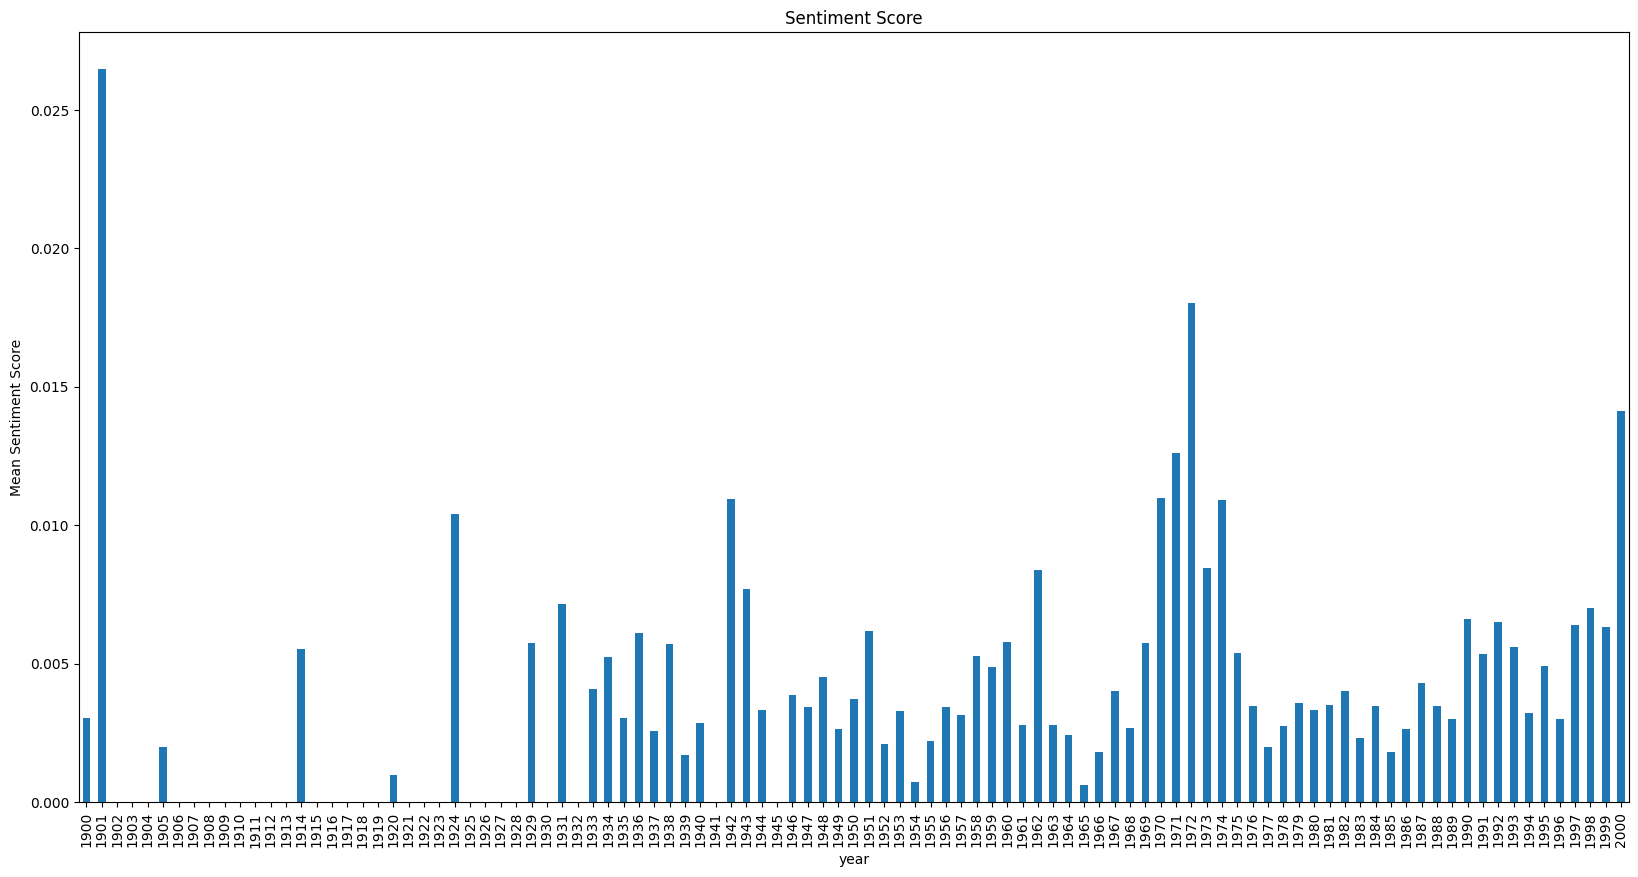

In [ ]:
#generate mean of sentiment_score by period
dfg = df_output.groupby(['dob_year'])['sentiment_score'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='year', figsize=(20, 10))

# Analysis

BAR PLOT BETWEEN MEAN SENTIMENT BY YEARS

The plot has reached its highest during 1901 which tells that the most positive comments are fetched from most of the users.
The plot has reached its lowest during 1954 and 1965 which tells that the most negative comments are fetched which alarms the improvement in companies polcies.

<Axes: title={'center': 'sentiment_score'}, xlabel='gender', ylabel='Mean Sentiment Score'>

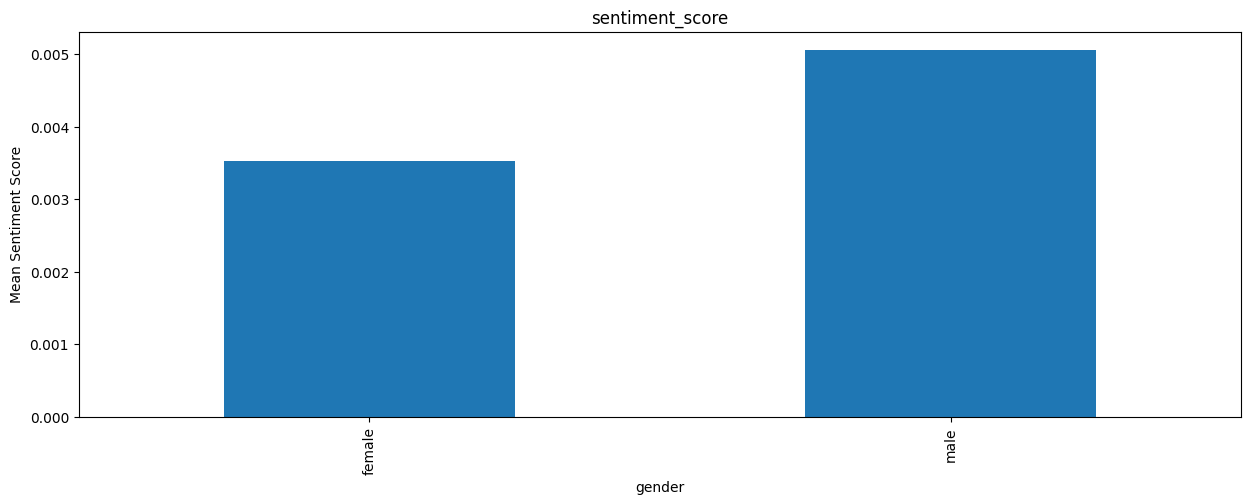

In [ ]:
dfg = df_output.groupby(['gender'])['sentiment_score'].mean()
dfg.plot(kind='bar', title='sentiment_score', ylabel='Mean Sentiment Score',
         xlabel='gender', figsize=(15, 5))

# Analysis

From the above graph it is clear that the males are more likely to be positive compared to female.

In [ ]:

df.corr()

<ipython-input-92-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,user id,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,Unnamed: 11,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,Comment Count,Share Count,Like Count,row_id
user id,1.000000,-0.007265,-0.000839,0.007265,0.002924,-0.003446,-0.001314,-0.001591,NaN,0.001526,-0.004868,0.001753,0.001828,0.001074,0.000856,0.000659,0.000903,0.003330
age,-0.007265,1.000000,0.035035,-1.000000,0.025167,0.462742,-0.027407,-0.058059,NaN,-0.022570,-0.026715,-0.024248,0.015585,-0.018224,-0.024979,-0.024092,-0.025555,-0.028822
dob_day,-0.000839,0.035035,1.000000,-0.035035,0.129443,0.041855,0.021961,0.022999,NaN,0.001367,0.014541,0.000497,0.009353,0.002460,-0.017911,-0.018371,-0.017904,0.048981
dob_year,0.007265,-1.000000,-0.035035,1.000000,-0.025167,-0.462742,0.027407,0.058059,NaN,0.022570,0.026715,0.024248,-0.015585,0.018224,0.024979,0.024092,0.025555,0.028822
dob_month,0.002924,0.025167,0.129443,-0.025167,1.000000,0.029446,0.019804,0.020075,NaN,0.006495,0.010400,0.006435,0.012136,0.006003,-0.021687,-0.021651,-0.021725,0.041844
tenure,-0.003446,0.462742,0.041855,-0.462742,0.029446,1.000000,0.166256,0.133505,NaN,0.027745,0.028052,0.023971,0.070757,0.030553,0.058744,0.058813,0.058338,0.262358
friend_count,-0.001314,-0.027407,0.021961,0.027407,0.019804,0.166256,1.000000,0.825850,NaN,0.236463,0.235656,0.232701,0.229803,0.220727,-0.293469,-0.293290,-0.294136,0.578750
friendships_initiated,-0.001591,-0.058059,0.022999,0.058059,0.020075,0.133505,0.825850,1.000000,NaN,0.175131,0.229808,0.173804,0.214022,0.161439,-0.257806,-0.257722,-0.258392,0.617271
Unnamed: 11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
likes_received,0.001526,-0.022570,0.001367,0.022570,0.006495,0.027745,0.236463,0.175131,NaN,1.000000,0.256998,0.973679,0.255365,0.947990,-0.029389,-0.029211,-0.029458,0.121343


 A Simple heatmap


<ipython-input-93-6ae80b754a5c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.imshow(df.corr(), cmap="Accent")
<ipython-input-93-6ae80b754a5c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xticks(range(len(df.corr().columns)), df.corr().columns,fontsize=50)
<ipython-input-93-6ae80b754a5c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.yticks(range(len(df.corr().columns)), df.corr().columns,fontsize=50)
<ipython-input-93-6ae80b754a5c>:6: FutureWarning: The d

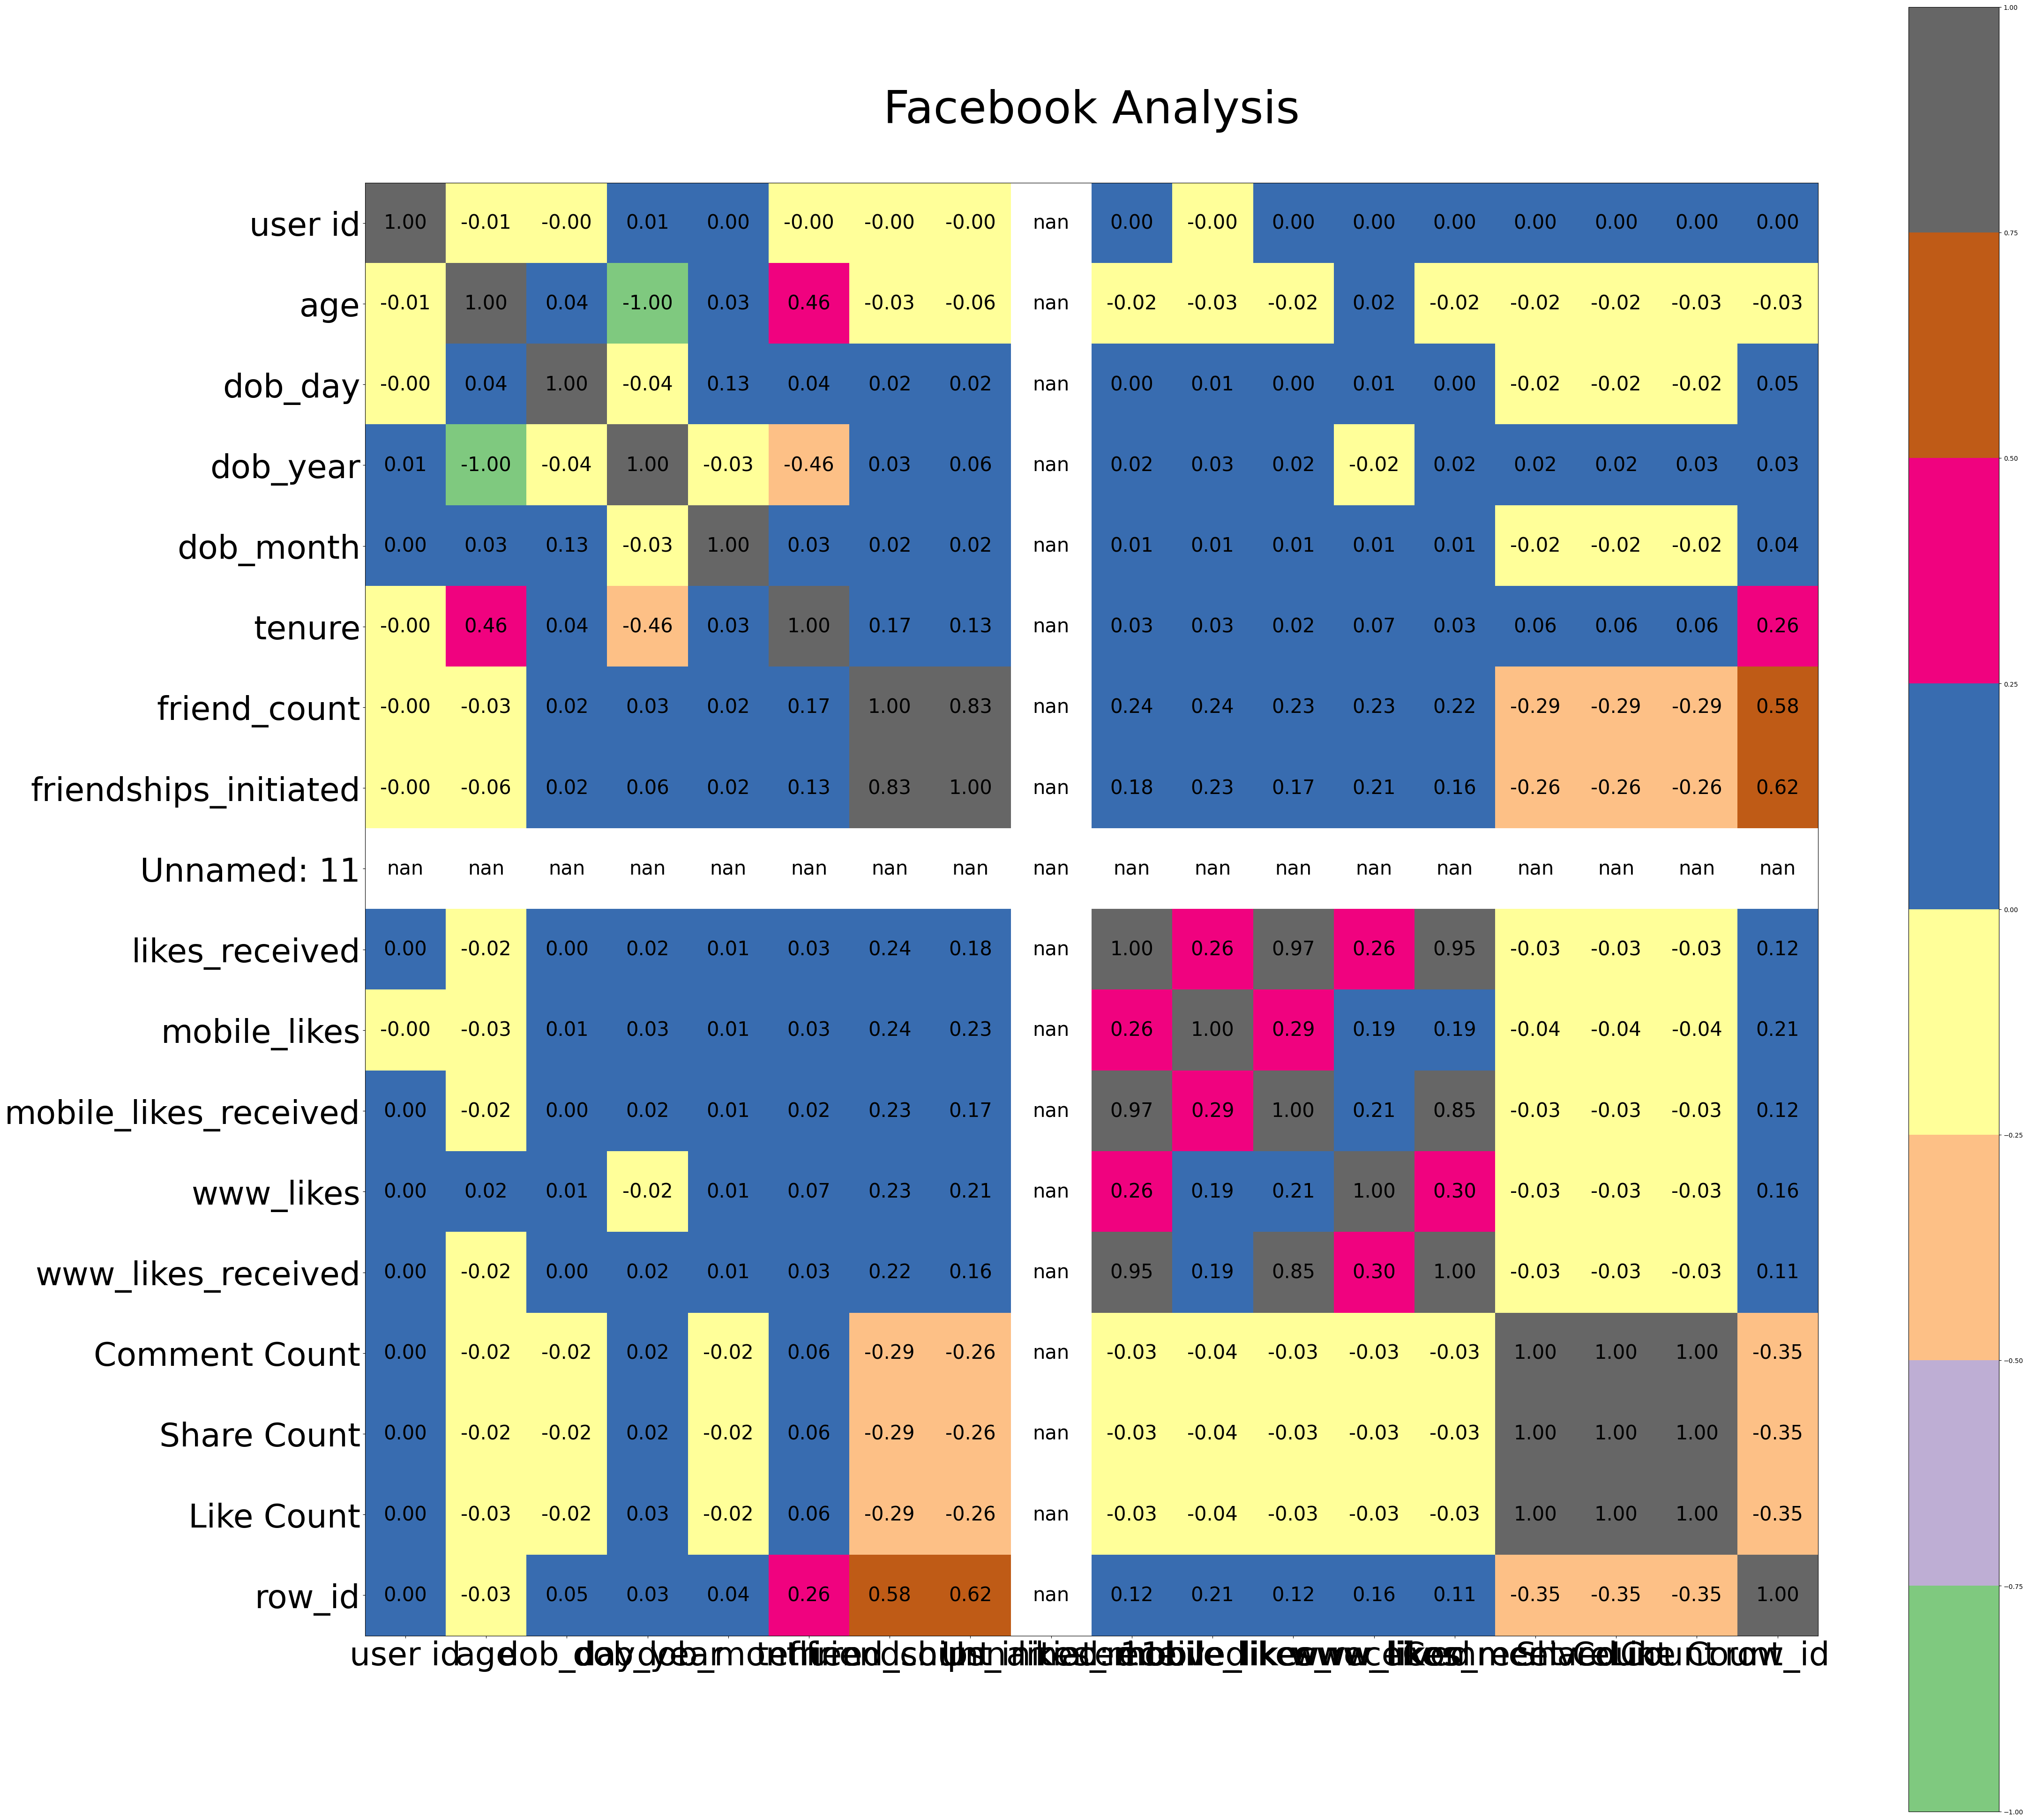

In [ ]:
plt.imshow(df.corr(), cmap="Accent")
plt.colorbar()
plt.gcf().set_size_inches(50, 50)
plt.xticks(range(len(df.corr().columns)), df.corr().columns,fontsize=50)
plt.yticks(range(len(df.corr().columns)), df.corr().columns,fontsize=50)
labels = df.corr().values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.2f}'.format(labels[b, a]), ha='center', va='center', color='black',fontsize=30)
plt.title(' Facebook Analysis \n', fontsize=70)
plt.show()

**Analysis**

The heat map has variety of colours where brighter colours represents the positive insight and lighter colours to neutral insights according to the scale in the right side. Almost the map is completely filled with the dark blue which tells that maximum comments are from neutral to likely positive. But thee map doesnt have any light green colour which says that no negative comments. Whreas the dark grey colour in the map represnts the stongest positive comments which tells that the facebook is reaching the users in its best way. Finally we should concentrate more on the dark blue area to turn it into the brown to grey region which suggest more positiveness.